## Generation of Human-Readable SMILES for common chemical substituents
Goal: generate human-readable names for indexing a substituent database for its use for automated structure substitution and workflow automatization.
<br>
Reference: collection of >6000 SMILES strings from P. Ertl (https://github.com/peter-ertl/craigplot) as reported in P. Ertl, J. Cheminform. (2020).
<br>
Data file *substituent-parameters.txt* is not redistributed: can be found in the original repo by P. Ertl https://github.com/peter-ertl/craigplot

In [1]:
import HumanSMILES as HS
import re

In [2]:
# Read the database
smiles = []
with open("substituent-parameters.txt","r") as fdb:
    for il,line in enumerate(fdb):
        if (il == 0):
            continue
        proc_line = line.split()
        smiles.append(proc_line[0])
        
        

HumanSMILES provides a solution to automatically obtain meaningful names, inspired by molecular formulas which are easy to read by any chemist.
Auto-naming strategy summary:
1. Generate explicit hydrogens from input SMILES (read and regenerate via RDKit)
2. Pass a basic dictionary to substitute common patterns.
3. Detect cyclic structures.
4. Process cycles:
    * Find cyclic fragment.
    * Isolate main cycle and branches, including positions.
    * Analyze the cycle to assign a common name or an automatic one.
5. Summarize long methylene chains.
6. Clean up the obtained name.


In [3]:
### Main execution
import importlib
importlib.reload(HS)
gen_names = HS.smile_humanizer(smiles)
Nproc = len(gen_names)
Ntot = len(smiles)
perc = 100.0*Nproc/Ntot
print("%d/%d names generated (%.2f %%)" % (Nproc,Ntot,perc))

5228/6278 names generated (83.27 %)


In [4]:
# Analyze substitutions, by the keys in the main substitution dictionary as located in the expanded SMILES
processed_names = [item[1] for item in gen_names]
processed_smiles = [item[2] for item in gen_names]
expanded_smiles = HS.re_smiler(processed_smiles)

for k,v in HS.common_people.items():
    subset = [exp_smile for exp_smile in expanded_smiles if k in exp_smile]
    Nsub = len(subset)
    perc = 100.0*Nsub/Nproc
    print("%s: %d/%d (%.2f %%)" % (v,Nsub,Nproc,perc))
    
# Add analysis of summarized methylenes
print("="*42)
rex = "\(CH2\)[0-9]?([0-9])"
ch2 = [entry for entry in processed_names if re.search(rex,entry)]
print("(CH2)n: %d/%d (%.2f %%)" % (len(ch2),Ntot,100.0*len(ch2)/Ntot))

[CF3]: 167/5228 (3.19 %)
[CF3]: 0/5228 (0.00 %)
[CCl3]: 1/5228 (0.02 %)
[CCl3]: 0/5228 (0.00 %)
[Ph]: 281/5228 (5.37 %)
[OCH3]: 405/5228 (7.75 %)
[tBu]: 84/5228 (1.61 %)
[tBu]: 0/5228 (0.00 %)
[CN]: 129/5228 (2.47 %)
[NC]: 0/5228 (0.00 %)
[NO2]: 88/5228 (1.68 %)
[NO2]: 0/5228 (0.00 %)
[COOH]: 321/5228 (6.14 %)
[CONH2]: 133/5228 (2.54 %)
[SO2]: 208/5228 (3.98 %)
(CH2)n: 1486/6278 (23.67 %)


In [5]:
### Identify cycles: benzenes, pyridines and auto-named structures
auto = [item for item in processed_names if "cyc" in item]
benz = [item for item in processed_names if "C6H" in item]
pyrs = [item for item in processed_names if "pyr" in item]

In [6]:
Nauto = len(auto)
Nbenz = len(benz)
Npyr = len(pyrs)
Ncycles = Nauto + Nbenz + Npyr
print("%d/%d cycles in named structures (%.2f %%)" % (Ncycles,Nproc,100.0*Ncycles/Nproc))
print("%d/%d auto-named cycs in named structures (%.2f %%)" % (Nauto,Nproc,100.0*Nauto/Nproc))
print("%d/%d benzenes in named structures (%.2f %%)" % (Nbenz,Nproc,100.0*Nbenz/Nproc))
print("%d/%d pyridines in named structures (%.2f %%)" % (Npyr,Nproc,100.0*Npyr/Nproc))

3729/5228 cycles in named structures (71.33 %)
1706/5228 auto-named cycs in named structures (32.63 %)
1680/5228 benzenes in named structures (32.13 %)
343/5228 pyridines in named structures (6.56 %)


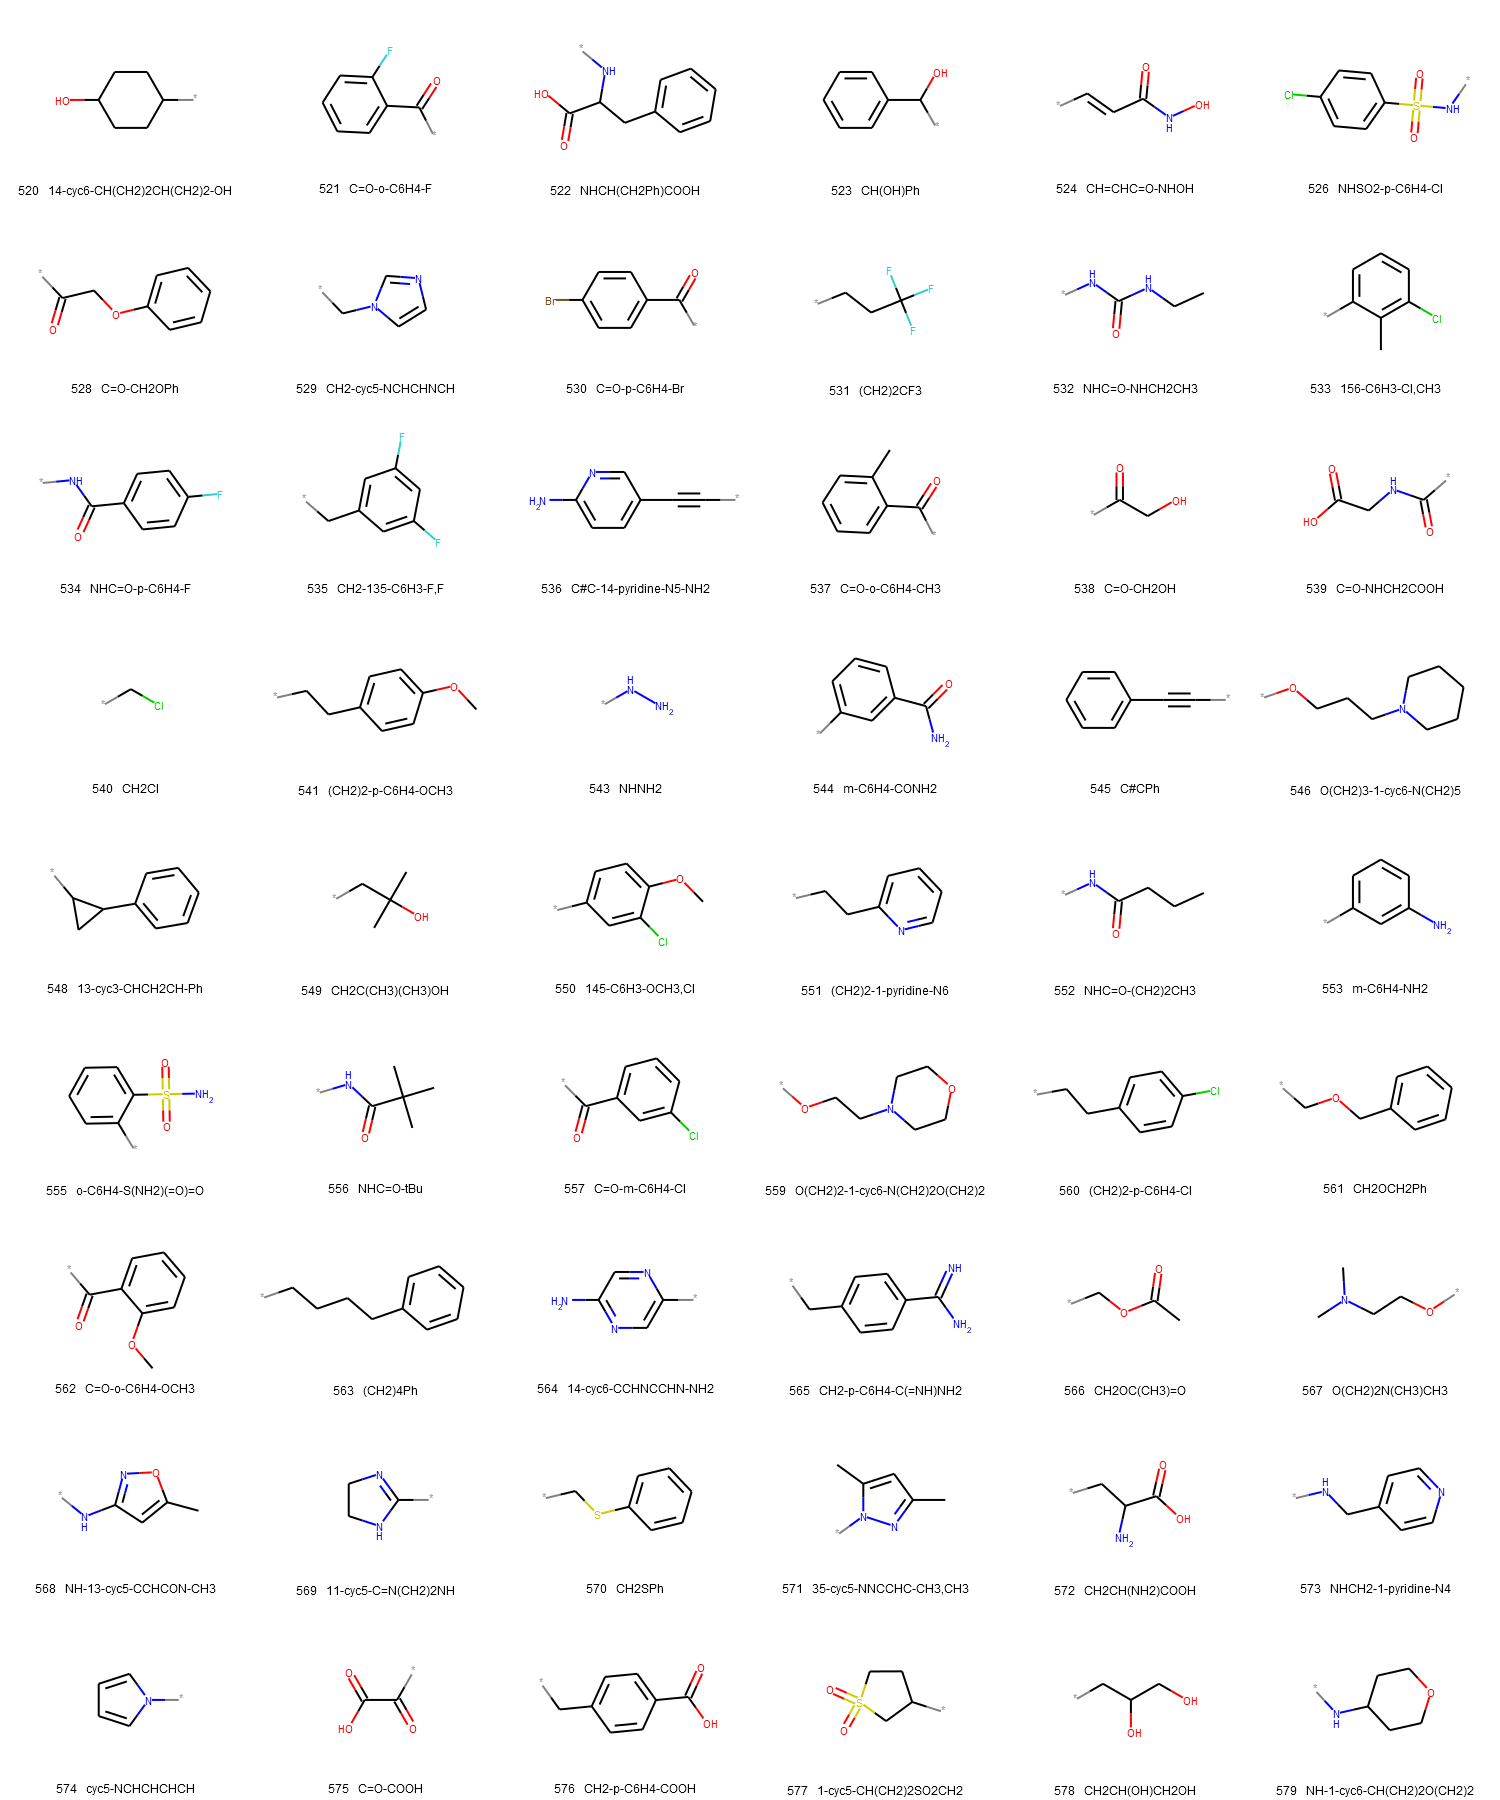

In [9]:
### Generation of images for the library
HS.image_generator(summ_names = gen_names[0:540], Nligs_page = 54,
                  mapname = "gen_ligands_", with_names = True,
                  mols_row = 6, sub_size = (250,200))